In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
def orbPhase(HJD,Epoch,period):
    #returns the period of an object using the Julian date, the Epoch of minimum 1, and the orbital period
    numerator = (HJD - (2.4E6) - Epoch) % period 
    ans = (numerator)/period
    
    return ans

In [4]:
#import the data
df = pd.read_csv('~/school_programs/AST401L_BXPeg/magnitudeData/bxpeg.dat', delim_whitespace=True)#import the data as a dataframe
#label each column
df.columns = ['frameName', 'objectNum', 'JD', 'col', 'line', 'BVR', 'mag', 'err']
#sort the dataframe by julian date
df = df.sort_values(by = ['JD'])

In [5]:
cols = ['objectNum','JD','BVR','mag','err']
#extract data from the cols columns and turn into a 2D np array
temp = df[cols].to_numpy()

#get data just from object 1, which should be BXPeg. any position that isn't from BXPeg gets assigned a zero that we will filter out next
bxpegMagsB = np.where((df.objectNum==1)&(df.BVR=='B'),df.mag,0)
bxpegMagsV = np.where((df.objectNum==1)&(df.BVR=='V'),df.mag,0)
bxpegMagsR = np.where((df.objectNum==1)&(df.BVR=='R'),df.mag,0)

#do the same for objects 2 and 3
twoMagsB = np.where((df.objectNum==2)&(df.BVR=='B'),df.mag,0)
twoMagsV = np.where((df.objectNum==2)&(df.BVR=='V'),df.mag,0)
twoMagsR = np.where((df.objectNum==2)&(df.BVR=='R'),df.mag,0)

threeMagsB = np.where((df.objectNum==3)&(df.BVR=='B'),df.mag,0)
threeMagsV = np.where((df.objectNum==3)&(df.BVR=='V'),df.mag,0)
threeMagsR = np.where((df.objectNum==3)&(df.BVR=='R'),df.mag,0)

#extract JD values:
HJDB = np.where((df.objectNum==1)&(df.BVR=='B'),df.JD,0)
HJDV = np.where((df.objectNum==1)&(df.BVR=='V'),df.JD,0)
HJDR = np.where((df.objectNum==1)&(df.BVR=='R'),df.JD,0)

In [6]:
#extract non-zero elements and reassign the mags arrays with those non zero values
bxpegMagsB = bxpegMagsB[bxpegMagsB != 0]
bxpegMagsV = bxpegMagsV[bxpegMagsV != 0]
bxpegMagsR = bxpegMagsR[bxpegMagsR != 0]

twoMagsB = twoMagsB[twoMagsB != 0]
twoMagsV = twoMagsV[twoMagsV != 0]
twoMagsR = twoMagsR[twoMagsR != 0]

threeMagsB = threeMagsB[threeMagsB != 0]
threeMagsV = threeMagsV[threeMagsV != 0]
threeMagsR = threeMagsR[threeMagsR != 0]

HJDB = HJDB[HJDB != 0]
HJDV = HJDV[HJDV != 0]
HJDR = HJDR[HJDR != 0]

In [7]:
#need to fix the indexing issue that will be caused by twoMags and threeMags by popping the last data point in each one
#check beforehand; problem arrays are = twoMagsB, andvthreeMags B. all others are the same size as their corresponding bxpeg arrays
length = np.size(twoMagsB)
last_index = length - 1
twoMagsB = np.delete(twoMagsB, last_index)
threeMagsB = np.delete(threeMagsB, last_index)

In [8]:
#calculating phase array for plotting: 
phaseB = orbPhase(HJDB,44195.3771,0.2804208)
phaseV = orbPhase(HJDV,44195.3771,0.2804208)
phaseR = orbPhase(HJDR,44195.3771,0.2804208)

In [9]:
#for each filter, create magnitude differences btwn the two comparrison stars and bxpeg and btwn themselves
#B filter
diff21B = twoMagsB - bxpegMagsB
diff31B = threeMagsB - bxpegMagsB
diff32B = threeMagsB - twoMagsB

#V filter
diff21V = twoMagsV - bxpegMagsV
diff31V = threeMagsV - bxpegMagsV
diff32V = threeMagsV - twoMagsV

#R filter
diff21R = twoMagsR - bxpegMagsR
diff31R = threeMagsR - bxpegMagsR
diff32R = threeMagsR - twoMagsR

In [10]:
#calc standard error for error bars
std_errorB = np.std(diff31B, ddof=1) / np.sqrt(len(diff31B))
std_errorV = np.std(diff31V, ddof=1) / np.sqrt(len(diff31V))
std_errorR = np.std(diff31R, ddof=1) / np.sqrt(len(diff31R))

std_errorRefB = np.std(diff32B, ddof=1) / np.sqrt(len(diff32B))
std_errorRefV = np.std(diff32V, ddof=1) / np.sqrt(len(diff32V))
std_errorRefR = np.std(diff32R, ddof=1) / np.sqrt(len(diff32R))

Time to plot. first lets plot the diffs vs the Julian date (JD, or HJD)

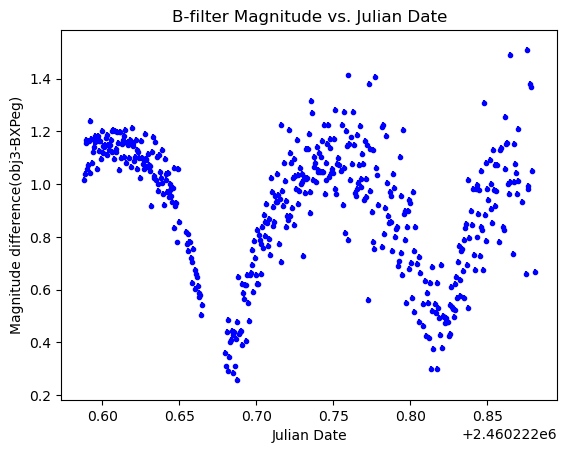

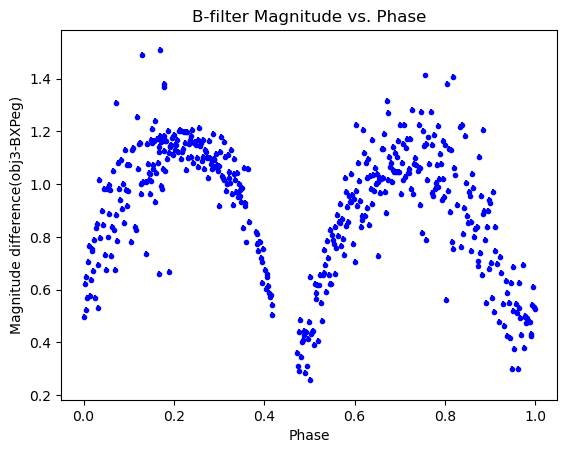

In [11]:
#plot the diffs vs. the JD for the B filter
plt.errorbar(HJDB,diff31B,fmt=".",color='b',yerr=std_errorB)
#plt.errorbar(HJDB,diff31B, yerr=std_errorB, fmt="o")
plt.title('B-filter Magnitude vs. Julian Date')
plt.ylabel('Magnitude difference(obj3-BXPeg)')
plt.xlabel('Julian Date')
plt.show()

#plot of mags vs. phase for B filter
plt.figure(2)
plt.errorbar(phaseB,diff31B,fmt=".",color='b',yerr=std_errorB)
#plt.errorbar(HJDB,diff31B,yerr=std_errorB, fmt="o")
plt.title('B-filter Magnitude vs. Phase')
plt.ylabel('Magnitude difference(obj3-BXPeg)')
plt.xlabel('Phase')
plt.show()

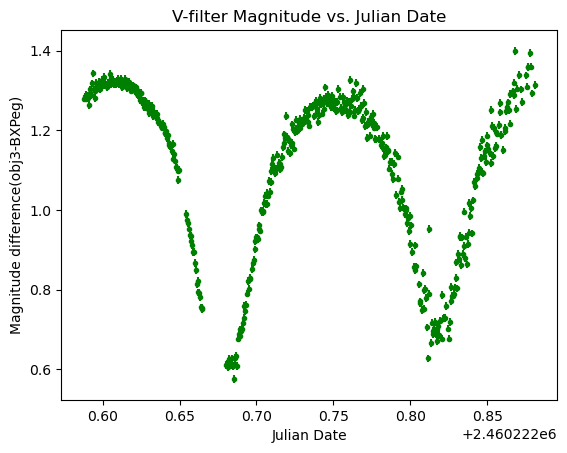

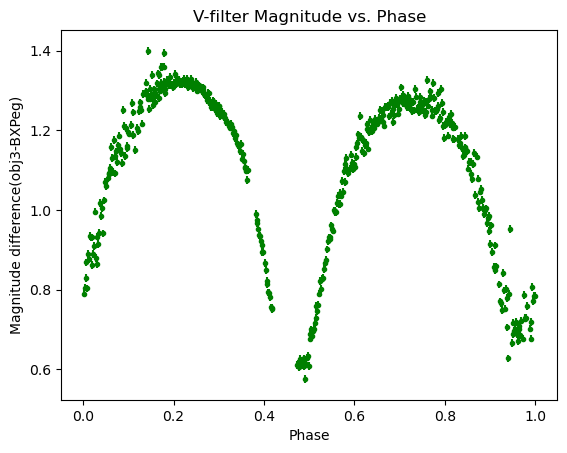

In [12]:
#plot the diffs vs. the JD for the V filter
plt.errorbar(HJDV,diff31V,fmt=".",color='g',yerr=std_errorV)
plt.title('V-filter Magnitude vs. Julian Date')
plt.ylabel('Magnitude difference(obj3-BXPeg)')
plt.xlabel('Julian Date')
plt.show()

#plot of mags vs. phase for B filter
plt.figure(2)
plt.errorbar(phaseV,diff31V,fmt=".",color='g',yerr=std_errorV)
plt.title('V-filter Magnitude vs. Phase')
plt.ylabel('Magnitude difference(obj3-BXPeg)')
plt.xlabel('Phase')
plt.show()

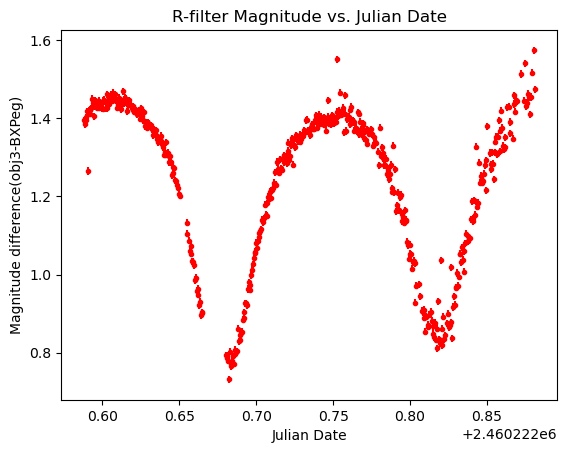

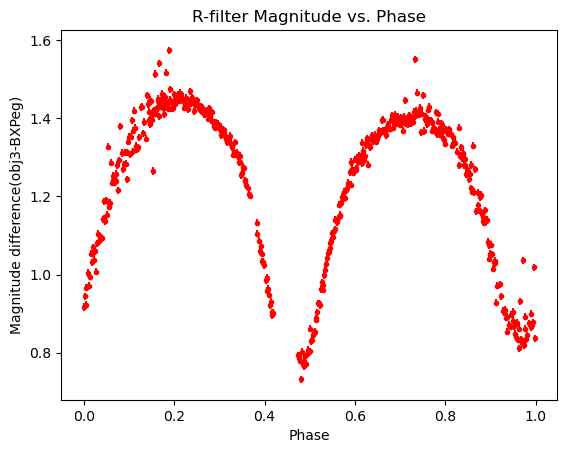

In [13]:
#plot the diffs vs. the JD for the R filter
plt.errorbar(HJDR,diff31R,fmt=".",color='r',yerr=std_errorR)
plt.title('R-filter Magnitude vs. Julian Date')
plt.ylabel('Magnitude difference(obj3-BXPeg)')
plt.xlabel('Julian Date')
plt.show()

#plot of mags vs. phase for B filter
plt.figure(2)
plt.errorbar(phaseR,diff31R,fmt=".",color='r',yerr=std_errorR)
plt.title('R-filter Magnitude vs. Phase')
plt.ylabel('Magnitude difference(obj3-BXPeg)')
plt.xlabel('Phase')
plt.show()

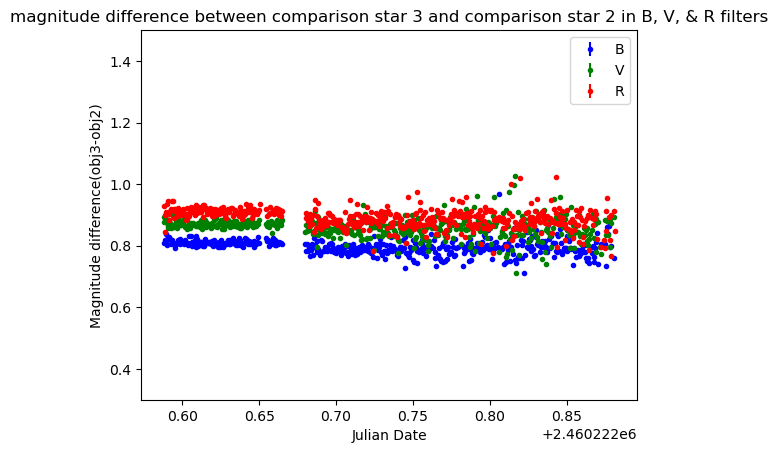

In [14]:
plt.errorbar(HJDB,diff32B,label='B',fmt=".",color='b',yerr=std_errorRefB)
plt.errorbar(HJDV,diff32V,label='V',fmt=".",color='g',yerr=std_errorRefV)
plt.errorbar(HJDR,diff32R,label='R',fmt=".",color='r',yerr=std_errorRefR)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Julian Date')
plt.ylabel('Magnitude difference(obj3-obj2)')
plt.ylim(bottom=0.3, top=1.5)
plt.title('magnitude difference between comparison star 3 and comparison star 2 in B, V, & R filters')
plt.show()

how it should look:
https://ui.adsabs.harvard.edu/abs/1982AcA....32..131H/abstract